# Historical price of stock GameStop Corp. CI A
Price information can be query and found at Market Watch website:

https://www.marketwatch.com/investing/stock/gme/download-data?startDate=9/28/2020&endDate=3/29/2021

# WallStreetBets reddit community posts 
Posts from community, data was obtained on Kaggle website:

https://www.kaggle.com/gpreda/reddit-wallstreetsbets-posts

# Historical price of stock GameStop Corp. CI A
Price information can found at BI Elite Training website:

https://training.bielite.com/topic/gamestop-stock-and-reddit-datasets/

# WallStreetBets reddit community posts 
Data from subreddit community WallStreetBets posts history was obtained on Kaggle website:

https://training.bielite.com/topic/gamestop-stock-and-reddit-datasets/

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [4]:
# get datasets into a dataframe format

# GME storical prices 
price_filepath = "./Download_Data_STOCK_US_XNYS_GME.csv"
reddit_wsb_filepath = "./reddit_wsb.csv"
# WallStreetBets posts
prices = pd.read_csv(price_filepath)
reddit_wsb = pd.read_csv(reddit_wsb_filepath)

## Game Stop historical price 

In [5]:
# describe stock GME prices dataframe
prices.describe()

,Open,High,Low,Close
count,125.000000,125.000000,125.000000,125.000000
mean,62.703440,72.424560,52.100000,60.393280
std,83.718908,98.338047,65.054972,77.792975
min,9.230000,9.560000,9.100000,9.130000
25%,12.780000,13.710000,12.140000,12.720000
50%,18.170000,19.100000,17.150000,17.690000
75%,72.410000,91.710000,53.330000,65.010000
max,379.710000,483.000000,262.270000,347.510000


In [5]:
# rows and columns size
prices.shape


(125, 6)

In [6]:
prices.head(20)

,Date,Open,High,Low,Close,Volume
0,03/26/2021,197.68,218.93,163.26,181.00,"37,430,672"
1,03/25/2021,123.49,187.50,116.90,183.75,"50,962,340"
2,03/24/2021,157.98,166.97,118.62,120.34,"24,177,881"
3,03/23/2021,197.50,201.75,177.55,181.75,"14,429,150"
4,03/22/2021,205.26,210.36,186.20,194.49,"10,061,510"
5,03/19/2021,195.73,227.00,182.66,200.27,"24,677,301"
6,03/18/2021,214.00,218.88,195.65,201.75,"11,799,910"
7,03/17/2021,217.84,231.47,204.00,209.81,"16,481,590"
8,03/16/2021,203.16,220.70,172.35,208.17,"35,422,871"
9,03/15/2021,277.52,283.00,206.00,220.14,"24,226,189"


In [7]:
prices.tail()

,Date,Open,High,Low,Close,Volume
120,10/02/2020,9.38,9.78,9.30,9.39,"4,340,484"
121,10/01/2020,10.09,10.25,9.69,9.77,"4,554,055"
122,09/30/2020,10.25,10.76,10.06,10.20,"6,079,033"
123,09/29/2020,10.00,10.65,9.93,10.35,"5,244,339"
124,09/28/2020,10.16,10.26,9.55,10.09,"6,764,323"


In [8]:
# checking for missing values
prices.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

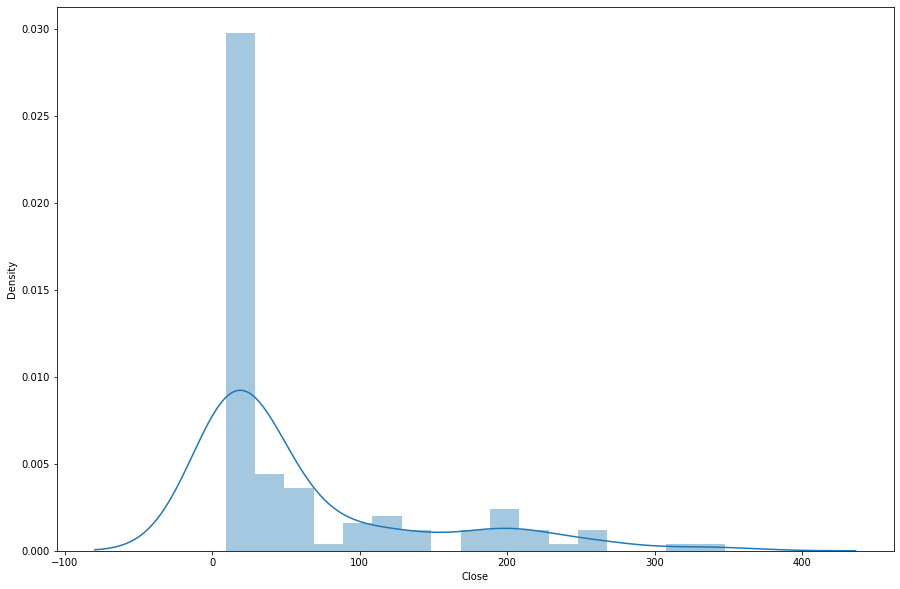

In [9]:
plt.figure(figsize = (15,10))
sns.distplot(prices['Close'])
plt.show()

In [10]:
# plotting prices vs dates

# first we need to convert our Date column to to datetime
prices['Date'] = pd.to_datetime(prices['Date'])
prices.head()


,Date,Open,High,Low,Close,Volume
0,2021-03-26,197.68,218.93,163.26,181.00,"37,430,672"
1,2021-03-25,123.49,187.50,116.90,183.75,"50,962,340"
2,2021-03-24,157.98,166.97,118.62,120.34,"24,177,881"
3,2021-03-23,197.50,201.75,177.55,181.75,"14,429,150"
4,2021-03-22,205.26,210.36,186.20,194.49,"10,061,510"


Text(0.5, 1.0, 'Closing price of GameStop stock')

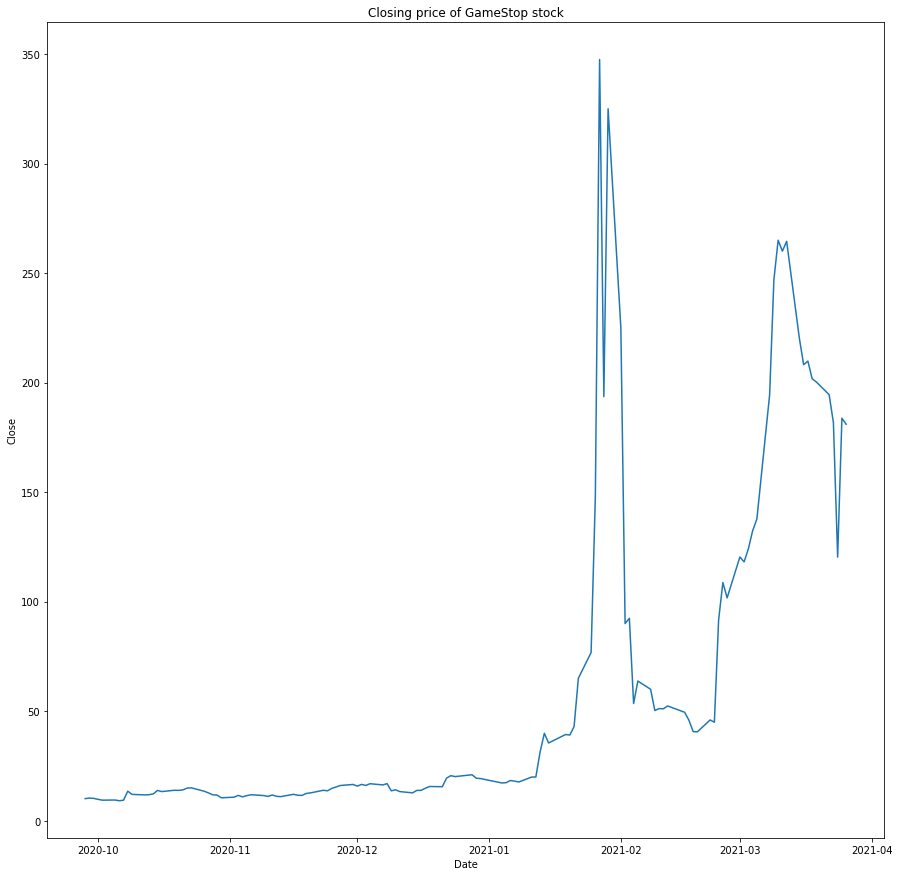

In [12]:
# plot
plt.figure(figsize=(15,15))
sns.lineplot(x = prices['Date'], y = prices['Close'])
plt.title('Closing price of GameStop stock')

In [13]:
# sorting dataframe by date, ascending order from older to newer
prices = prices.sort_values(by='Date')
prices.head()

,Date,Open,High,Low,Close,Volume
124,2020-09-28,10.16,10.26,9.55,10.09,"6,764,323"
123,2020-09-29,10.00,10.65,9.93,10.35,"5,244,339"
122,2020-09-30,10.25,10.76,10.06,10.20,"6,079,033"
121,2020-10-01,10.09,10.25,9.69,9.77,"4,554,055"
120,2020-10-02,9.38,9.78,9.30,9.39,"4,340,484"


## WallStreetBets reddit data

In [14]:
# analyzing reddit wall street bets dataframe
reddit_wsb.shape

(43772, 8)

In [15]:
# visualing the first 5 rows of information
reddit_wsb.head()

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56


In [20]:
# sorting dataframe by timestamp, ascending
reddit_wsb = reddit_wsb.sort_values(by='timestamp')
reddit_wsb.head(15)

,title,score,id,url,comms_num,created,body,timestamp
32591,$CBAT $SUNW $SPI $OXBR Y'all are missing the p...,4,j1fmmo,https://www.reddit.com/r/wallstreetbets/commen...,11,1.601340e+09,$CBAT is going to be a great play further yet:...,2020-09-29 03:46:56
257,An autists journey. $150 to $68k in one month....,50,l6h58v,https://www.reddit.com/gallery/l6h58v,8,1.611818e+09,NaN,2021-01-28 09:08:16
256,You all have made Melvin live up to its name,70,l6h59b,https://i.redd.it/59sk10r7iyd61.png,7,1.611818e+09,NaN,2021-01-28 09:08:17
255,I got in late on GME but I believe in the caus...,75,l6h5a2,https://www.reddit.com/r/wallstreetbets/commen...,14,1.611818e+09,You guys are amazing. Thank you for sending GM...,2021-01-28 09:08:18
254,Highest SI % of Float End of Business Jan 27th...,26,l6h5am,https://www.reddit.com/r/wallstreetbets/commen...,22,1.611818e+09,Will Update Daily At Market Close\n\nTop 5 sec...,2021-01-28 09:08:19
253,What are you doing to AMC?,67,l6h5b8,https://www.reddit.com/r/wallstreetbets/commen...,55,1.611818e+09,Hey retards what the hell is going on with AMC...,2021-01-28 09:08:21
252,Discord still down,0,l6h5bt,https://www.reddit.com/r/wallstreetbets/commen...,6,1.611818e+09,i can't see how to talk to to any anti bot mea...,2021-01-28 09:08:21
251,HOW CAN I BUY STOCK????!!!,0,l6h5km,https://www.reddit.com/r/wallstreetbets/commen...,12,1.611818e+09,I'm from canada and want to know the best trad...,2021-01-28 09:08:40
250,"Buy games at GameStop, donate to charity (not ...",50,l6h5l4,https://www.reddit.com/r/wallstreetbets/commen...,9,1.611818e+09,"Value goes up, kids play video games",2021-01-28 09:08:41
249,Hmmmmmm turns out BlackRock is making use of o...,66,l6h5ov,https://i.redd.it/6wka0oehiyd61.jpg,8,1.611818e+09,NaN,2021-01-28 09:08:47


## Insights
There is useful information starting in January 28, 2021. I will leave it because it is not related to GME, later it will get dropped after next block of code, where we check for strings to match GameStop comments.

In [25]:
# Dropping columns that wont be used
reddit_wsb_copy = reddit_wsb.drop(columns = ['id','url','created']) # returns a copy of dataframe
reddit_wsb_copy.head()
# we leave number of comments for now, comms_num

,title,score,comms_num,body,timestamp
32591,$CBAT $SUNW $SPI $OXBR Y'all are missing the p...,4,11,$CBAT is going to be a great play further yet:...,2020-09-29 03:46:56
257,An autists journey. $150 to $68k in one month....,50,8,NaN,2021-01-28 09:08:16
256,You all have made Melvin live up to its name,70,7,NaN,2021-01-28 09:08:17
255,I got in late on GME but I believe in the caus...,75,14,You guys are amazing. Thank you for sending GM...,2021-01-28 09:08:18
254,Highest SI % of Float End of Business Jan 27th...,26,22,Will Update Daily At Market Close\n\nTop 5 sec...,2021-01-28 09:08:19


In [26]:
# looking for GME, and GameStop keywords
search_list = set(['GME','GAMESTOP','GME!','GAMESTOP!'])
reddit_wsb["Mention"] = reddit_wsb["title"].apply(lambda x: set.intersection(set(x.upper().split(' ')), search_list))

reddit_wsb.head()

,title,score,id,url,comms_num,created,body,timestamp,Mention
32591,$CBAT $SUNW $SPI $OXBR Y'all are missing the p...,4,j1fmmo,https://www.reddit.com/r/wallstreetbets/commen...,11,1.601340e+09,$CBAT is going to be a great play further yet:...,2020-09-29 03:46:56,{}
257,An autists journey. $150 to $68k in one month....,50,l6h58v,https://www.reddit.com/gallery/l6h58v,8,1.611818e+09,NaN,2021-01-28 09:08:16,{}
256,You all have made Melvin live up to its name,70,l6h59b,https://i.redd.it/59sk10r7iyd61.png,7,1.611818e+09,NaN,2021-01-28 09:08:17,{}
255,I got in late on GME but I believe in the caus...,75,l6h5a2,https://www.reddit.com/r/wallstreetbets/commen...,14,1.611818e+09,You guys are amazing. Thank you for sending GM...,2021-01-28 09:08:18,{GME}
254,Highest SI % of Float End of Business Jan 27th...,26,l6h5am,https://www.reddit.com/r/wallstreetbets/commen...,22,1.611818e+09,Will Update Daily At Market Close\n\nTop 5 sec...,2021-01-28 09:08:19,{}


In [27]:
# removing rows without a match from the list
reddit_wsb = reddit_wsb[reddit_wsb['Mention'].astype(bool)]
reddit_wsb.head()

,title,score,id,url,comms_num,created,body,timestamp,Mention
255,I got in late on GME but I believe in the caus...,75,l6h5a2,https://www.reddit.com/r/wallstreetbets/commen...,14,1.611818e+09,You guys are amazing. Thank you for sending GM...,2021-01-28 09:08:18,{GME}
246,More GME reinforcements on the way,255,l6h5u6,https://i.redd.it/k3w16njiiyd61.jpg,30,1.611818e+09,NaN,2021-01-28 09:08:58,{GME}
240,Is it too late to buy Gamestop shares?,50,l6h685,https://www.reddit.com/r/wallstreetbets/commen...,54,1.611818e+09,I’ve been really busy this week and haven’t be...,2021-01-28 09:09:21,{GAMESTOP}
238,Remember to spend some of your loot at gamestop!,106,l6h6dv,https://www.reddit.com/r/wallstreetbets/commen...,17,1.611818e+09,When you do cash out remember to spend a bit o...,2021-01-28 09:09:33,{GAMESTOP!}
236,DELUGE of SPAM posts of stocks like Nokia and ...,43,l6h6y0,https://www.reddit.com/r/wallstreetbets/commen...,20,1.611818e+09,"I might not be able to read letters, but numbe...",2021-01-28 09:10:11,{GME}


In [28]:
# total of posts that included the strings GME and GameStop 
reddit_wsb.shape

(6168, 9)

In [34]:
reddit_wsb = reddit_wsb.sort_values(by='timestamp', ascending = True)
reddit_wsb.head()

,title,score,id,url,comms_num,created,body,timestamp,Mention
255,I got in late on GME but I believe in the caus...,75,l6h5a2,https://www.reddit.com/r/wallstreetbets/commen...,14,1.611818e+09,You guys are amazing. Thank you for sending GM...,2021-01-28 09:08:18,{GME}
246,More GME reinforcements on the way,255,l6h5u6,https://i.redd.it/k3w16njiiyd61.jpg,30,1.611818e+09,NaN,2021-01-28 09:08:58,{GME}
240,Is it too late to buy Gamestop shares?,50,l6h685,https://www.reddit.com/r/wallstreetbets/commen...,54,1.611818e+09,I’ve been really busy this week and haven’t be...,2021-01-28 09:09:21,{GAMESTOP}
238,Remember to spend some of your loot at gamestop!,106,l6h6dv,https://www.reddit.com/r/wallstreetbets/commen...,17,1.611818e+09,When you do cash out remember to spend a bit o...,2021-01-28 09:09:33,{GAMESTOP!}
236,DELUGE of SPAM posts of stocks like Nokia and ...,43,l6h6y0,https://www.reddit.com/r/wallstreetbets/commen...,20,1.611818e+09,"I might not be able to read letters, but numbe...",2021-01-28 09:10:11,{GME}
